In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

### przydatne linki
https://docs.scipy.org/doc/scipy/reference/ndimage.html

In [2]:
def display_image(img):
    img = img[::-1]
    plt.figure(figsize=(5,5))
    plt.pcolor(img, edgecolors='w', linewidths=1)
    plt.xticks(np.arange(0, img.shape[1]+1, 1))
    plt.yticks(np.arange(0, img.shape[0]+1, 1))
    plt.show()

### Generate string array of size

In [3]:
size = (5, 5)
default_value = 0
print('[')
for i in range(size[0]):
    print('[' + f'{default_value}, ' * size[1] + '],')    
    for j in range(size[1]):
        pass
print(']')

[
[0, 0, 0, 0, 0, ],
[0, 0, 0, 0, 0, ],
[0, 0, 0, 0, 0, ],
[0, 0, 0, 0, 0, ],
[0, 0, 0, 0, 0, ],
]


## filtr (medianowy)

In [4]:
img = [
[.4, .5, .9, .1, .3, ],
[1., .7, .8, .1, .2, ],
[.8, .5, .6, 0., .1, ],
[.5, .2, .1, .2, .9, ],
[.1, .9, .2, .5, .4, ],
]
result = ndimage.median_filter(img, size=3)
display(img)
display(result)

[[0.4, 0.5, 0.9, 0.1, 0.3],
 [1.0, 0.7, 0.8, 0.1, 0.2],
 [0.8, 0.5, 0.6, 0.0, 0.1],
 [0.5, 0.2, 0.1, 0.2, 0.9],
 [0.1, 0.9, 0.2, 0.5, 0.4]]

array([[0.5, 0.7, 0.5, 0.3, 0.2],
       [0.7, 0.7, 0.5, 0.2, 0.1],
       [0.7, 0.6, 0.2, 0.2, 0.2],
       [0.5, 0.5, 0.2, 0.2, 0.4],
       [0.2, 0.2, 0.2, 0.4, 0.4]])

## Konwolucja, uwaga: kernel jest odwracany w implementacji scipy, dla innego dzialania trzeba k[::-1,::-1]

In [5]:
a = np.array([[1, 2, 0, 0],
              [5, 3, 0, 4],
              [0, 0, 0, 7],
              [9, 3, 0, 0]])
k = np.array([[0,0,0],
              [0,0,0],
              [0,0,1]])
ndimage.convolve(a, k, mode='constant', cval=0.0)

array([[0, 0, 0, 0],
       [0, 1, 2, 0],
       [0, 5, 3, 0],
       [0, 0, 0, 0]])

## operacje morfologiczne 

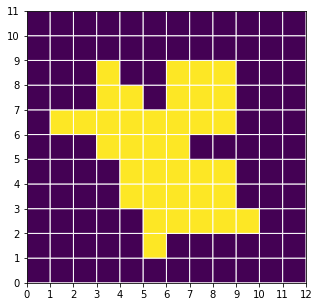

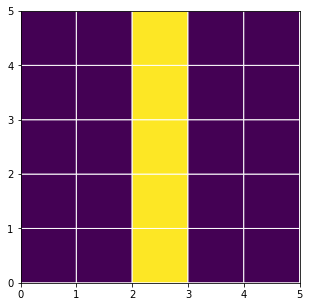

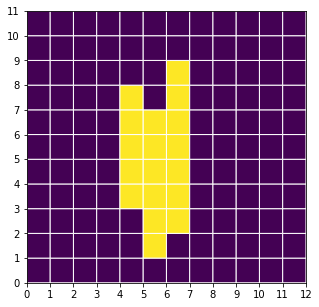

In [6]:
operation = ndimage.binary_opening # possible ndimage: binary_opening, binary_opening, binary_dilation, binary_erosion

img = np.array([
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,],
[0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,],
[0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,],
[0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,],
[0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,],
[0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,],
[0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,],
[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,],
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,],
])
kernel = np.array([
[0, 0, 1, 0, 0, ],
[0, 0, 1, 0, 0, ],
[0, 0, 1, 0, 0, ],
[0, 0, 1, 0, 0, ],
[0, 0, 1, 0, 0, ],
])
display_image(img)
display_image(kernel)
output = ndimage.binary_opening(img, structure=kernel).astype(int)
display_image(output)

## transformata Hough

1


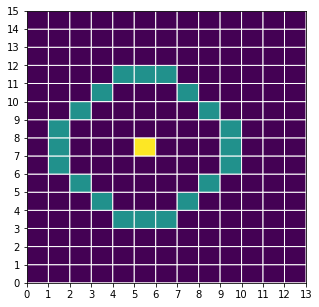

In [7]:
img_size = (15, 13) # y, x !!!!
x_center, y_center = 5, 7
r = 4

def circle(x, x_center, y, y_center, r):
#     print((x-x_center)**2 + (y - y_center)**2 - r**2)
    if (x, y) == (4, 3):
        print((x-x_center)**2 + (y - y_center)**2 - r**2)
    return -3 <= (x-x_center)**2 + (y - y_center)**2 - r**2 <= 1 # nie jestem pewny jakie kryterium ustawic?

img = np.zeros(img_size)
img[y_center, x_center] = 2
for y in range(img_size[0]):
    for x in range(img_size[1]):
        if circle(x, x_center, y, y_center, r):
            img[y, x]  = 1
display_image(img)

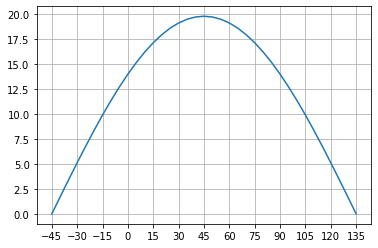

In [8]:
x, y = 14, 14
def r(x, y, th):
    return np.cos(np.deg2rad(th)) * x + np.sin(np.deg2rad(th))* y

arr = np.arange(-45, 136, 5)
plt.plot(arr, [r(x, y, th) for th in arr])
plt.xticks(np.arange(-45, 130+15, 15))
plt.yticks(np.arange(0, 22.5, 2.5))
plt.grid()


## transofrmata afiniczna

dla perspektywicznej bedzie podobnie https://en.wikipedia.org/wiki/Transformation_matrix

In [9]:
a = [(0,0), (10,10), (0,20)]
b = [(110,30), (90,50), (70,30)]

def row(a,b):
    # p_b = p_a * m
    p_a = np.ones((3,3))
    p_b = np.ones((3,3))    
    
    for i, (x,y) in enumerate(a):
        p_a[i, 0:2] = x,y
    for i, (x,y) in enumerate(b):
        p_b[i, 0:2] = x,y
    
    print('p_a = \n',  p_a)
    print('p_b = \n',  p_b)
    
    m = np.linalg.inv(p_a) @ p_b 
    print('m = \n',  m)
    
def column(a,b):
    # p_b = m * p_a
    p_a = np.ones((3,3))
    p_b = np.ones((3,3))    
    
    for i, (x,y) in enumerate(a):
        p_a[0:2, i] = x,y
    for i, (x,y) in enumerate(b):
        p_b[0:2, i] = x,y
    
    print('p_a = \n',  p_a)
    print('p_b = \n',  p_b)
    
    m = p_b @ np.linalg.inv(p_a)
    print('m = \n',  m)


np.set_printoptions(suppress=True)
print('wektor wierszowy')
row(a,b)
print('\nwektor kolumnowy')
column(a,b)

wektor wierszowy
p_a = 
 [[ 0.  0.  1.]
 [10. 10.  1.]
 [ 0. 20.  1.]]
p_b = 
 [[110.  30.   1.]
 [ 90.  50.   1.]
 [ 70.  30.   1.]]
m = 
 [[  0.   2.   0.]
 [ -2.   0.   0.]
 [110.  30.   1.]]

wektor kolumnowy
p_a = 
 [[ 0. 10.  0.]
 [ 0. 10. 20.]
 [ 1.  1.  1.]]
p_b = 
 [[110.  90.  70.]
 [ 30.  50.  30.]
 [  1.   1.   1.]]
m = 
 [[  0.  -2. 110.]
 [  2.   0.  30.]
 [  0.   0.   1.]]


## Moments

In [10]:
def run_regular_moments(image, p, q):
    mpq = 0
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i, j] == 1:
                mpq += (i ** p) * (j ** q)
    return mpq

def run_central_moments(image, p, q):
    m00 = np.sum(image)
    x_ = run_regular_moments(image, 1, 0) / m00
    y_ = run_regular_moments(image, 0, 1) / m00
    mpq = 0
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i, j] == 1:
                mpq += ((i - x_) ** p) * ((j - y_) ** q)
    return mpq


image = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0, 0, 1, 0],
    [0, 1, 1, 1, 0, 0, 1, 0],
    [0, 1, 1, 1, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 1, 1, 0],
    [0, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
])

print(run_central_moments(image, 3, 0))
print(run_central_moments(image, 0, 3))

18.60770975056691
18.607709750566908


## fourier

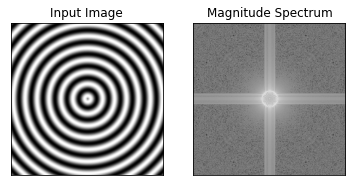

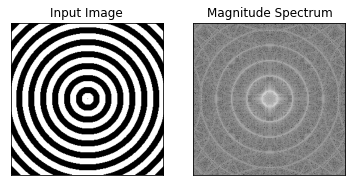

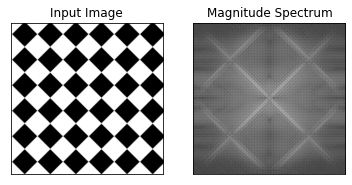

In [11]:
def fourier_transform(path):
    img = cv2.imread(path, 0)
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift))

    plt.subplot(121), plt.imshow(img, cmap='gray')
    plt.title('Input Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
    plt.show()

fourier_transform('1.png')
fourier_transform('2.png')
fourier_transform('3.png')